In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
   # The "listdir()" function of the os module allows us to list files and folders within a directory

   # If we want to list the contents of a different directory, it will be enough to write the name of that directory as the parameter. "os.listdir ('/ var / www')"
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'mountain':
            label = 3
        elif labels == 'sea':
            label = 4
        elif labels == 'street':
            label = 5
            
        
       # Here with for loop, we go into each file and make the size of the pictures there as 150x150.
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder

            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
            
            
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.


def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]
    

# Extract the training images from folder

In [3]:
Images, Labels = get_images('/kaggle/input/intel-image-classification/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [4]:
# shape of Training data set
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


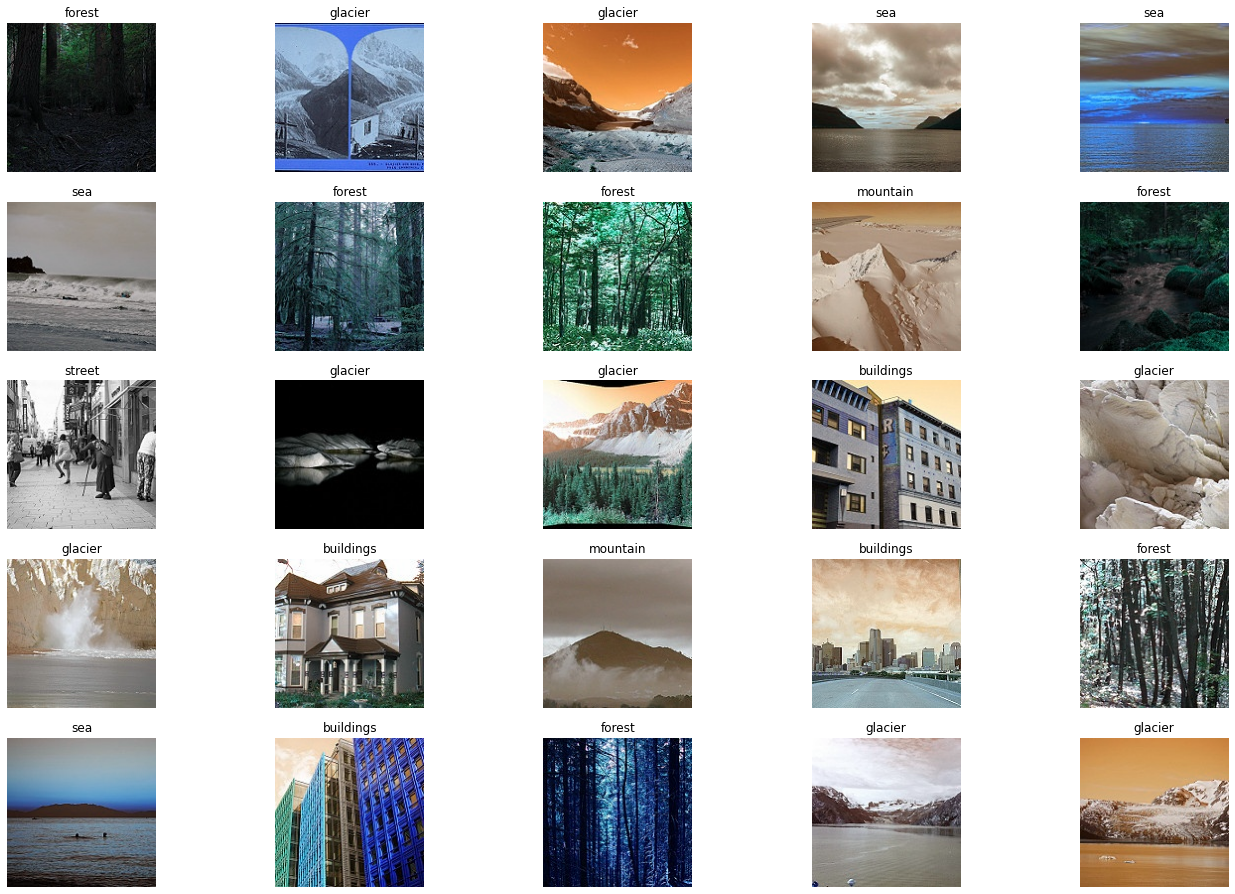

In [5]:
# Lets plot some of training images
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3) # adjust the spaces between images
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

# CNN Model

In [6]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

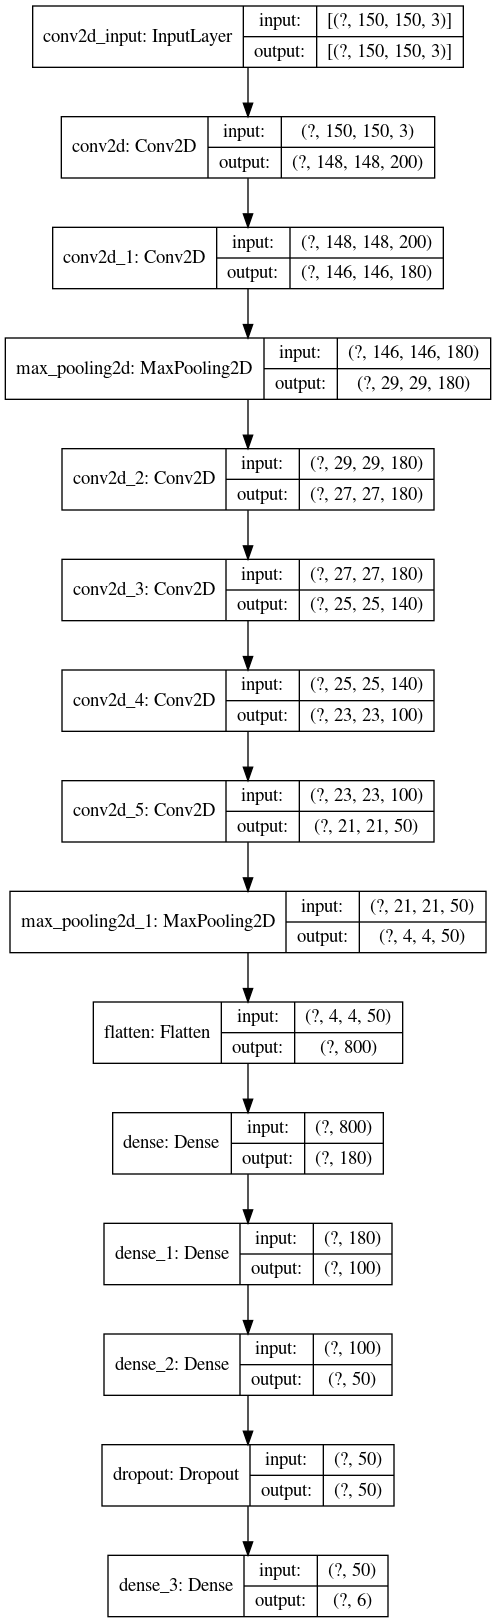

In [7]:
# Dot representation of the model
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [8]:
# Fitting the model    /  Splitting model as %70 train and 30% validation set
trained = model.fit(Images,Labels,epochs=10,validation_split=0.30)

Epoch 1/10
307/307 [==============================] - 47s 152ms/step - loss: 1.4977 - accuracy: 0.3937 - val_loss: 1.2182 - val_accuracy: 0.5255
Epoch 2/10
307/307 [==============================] - 45s 147ms/step - loss: 1.1489 - accuracy: 0.5401 - val_loss: 1.0364 - val_accuracy: 0.5908
Epoch 3/10
307/307 [==============================] - 45s 147ms/step - loss: 0.9990 - accuracy: 0.6224 - val_loss: 0.8211 - val_accuracy: 0.6998
Epoch 4/10
307/307 [==============================] - 45s 147ms/step - loss: 0.8697 - accuracy: 0.6823 - val_loss: 0.7322 - val_accuracy: 0.7286
Epoch 5/10
307/307 [==============================] - 45s 147ms/step - loss: 0.7879 - accuracy: 0.7191 - val_loss: 0.6706 - val_accuracy: 0.7499
Epoch 6/10
307/307 [==============================] - 45s 147ms/step - loss: 0.7063 - accuracy: 0.7578 - val_loss: 0.6151 - val_accuracy: 0.7939
Epoch 7/10
307/307 [==============================] - 45s 147ms/step - loss: 0.6678 - accuracy: 0.7733 - val_loss: 0.6260 - val_ac

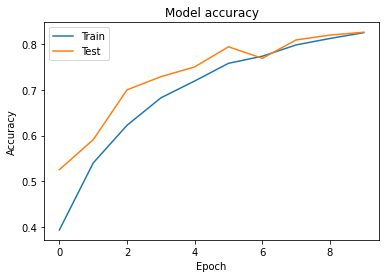

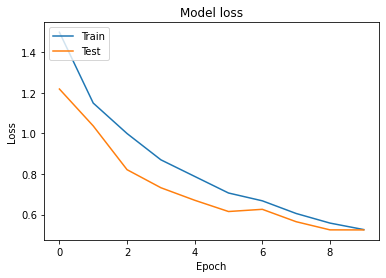

In [9]:
# Plotting accuracy values of the train and validation sets
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

# Plotting loss values of the train and validation sets
plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

# Evaluation of the Test Images


In [ ]:
# Extract the Test images from folder
test_images,test_labels = get_images('/kaggle/input/intel-image-classification/seg_test/seg_test/') #Extract the training images from the folders.')
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [10]:
# Evaluation of the test set
model.evaluate(test_images,test_labels, verbose=1)

94/94 [==============================] - 4s 46ms/step - loss: 0.4991 - accuracy: 0.8340


[0.499114990234375, 0.8339999914169312]

# Prediction of pred set

In [11]:
# Plot confusion matrix 
import matplotlib.pyplot as plt
# Note: This code snippet for confusion-matrix is taken directly from the SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

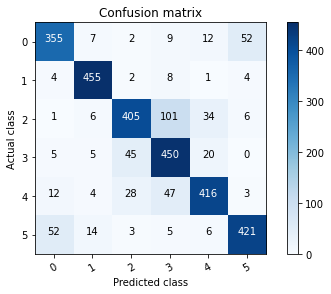

In [13]:
import sklearn.metrics as metrics
from collections import Counter
import itertools

Y_pred = model.predict(test_images)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 

confusion_matrix = metrics.confusion_matrix(y_true=test_labels, y_pred=Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_matrix, classes = range(6))

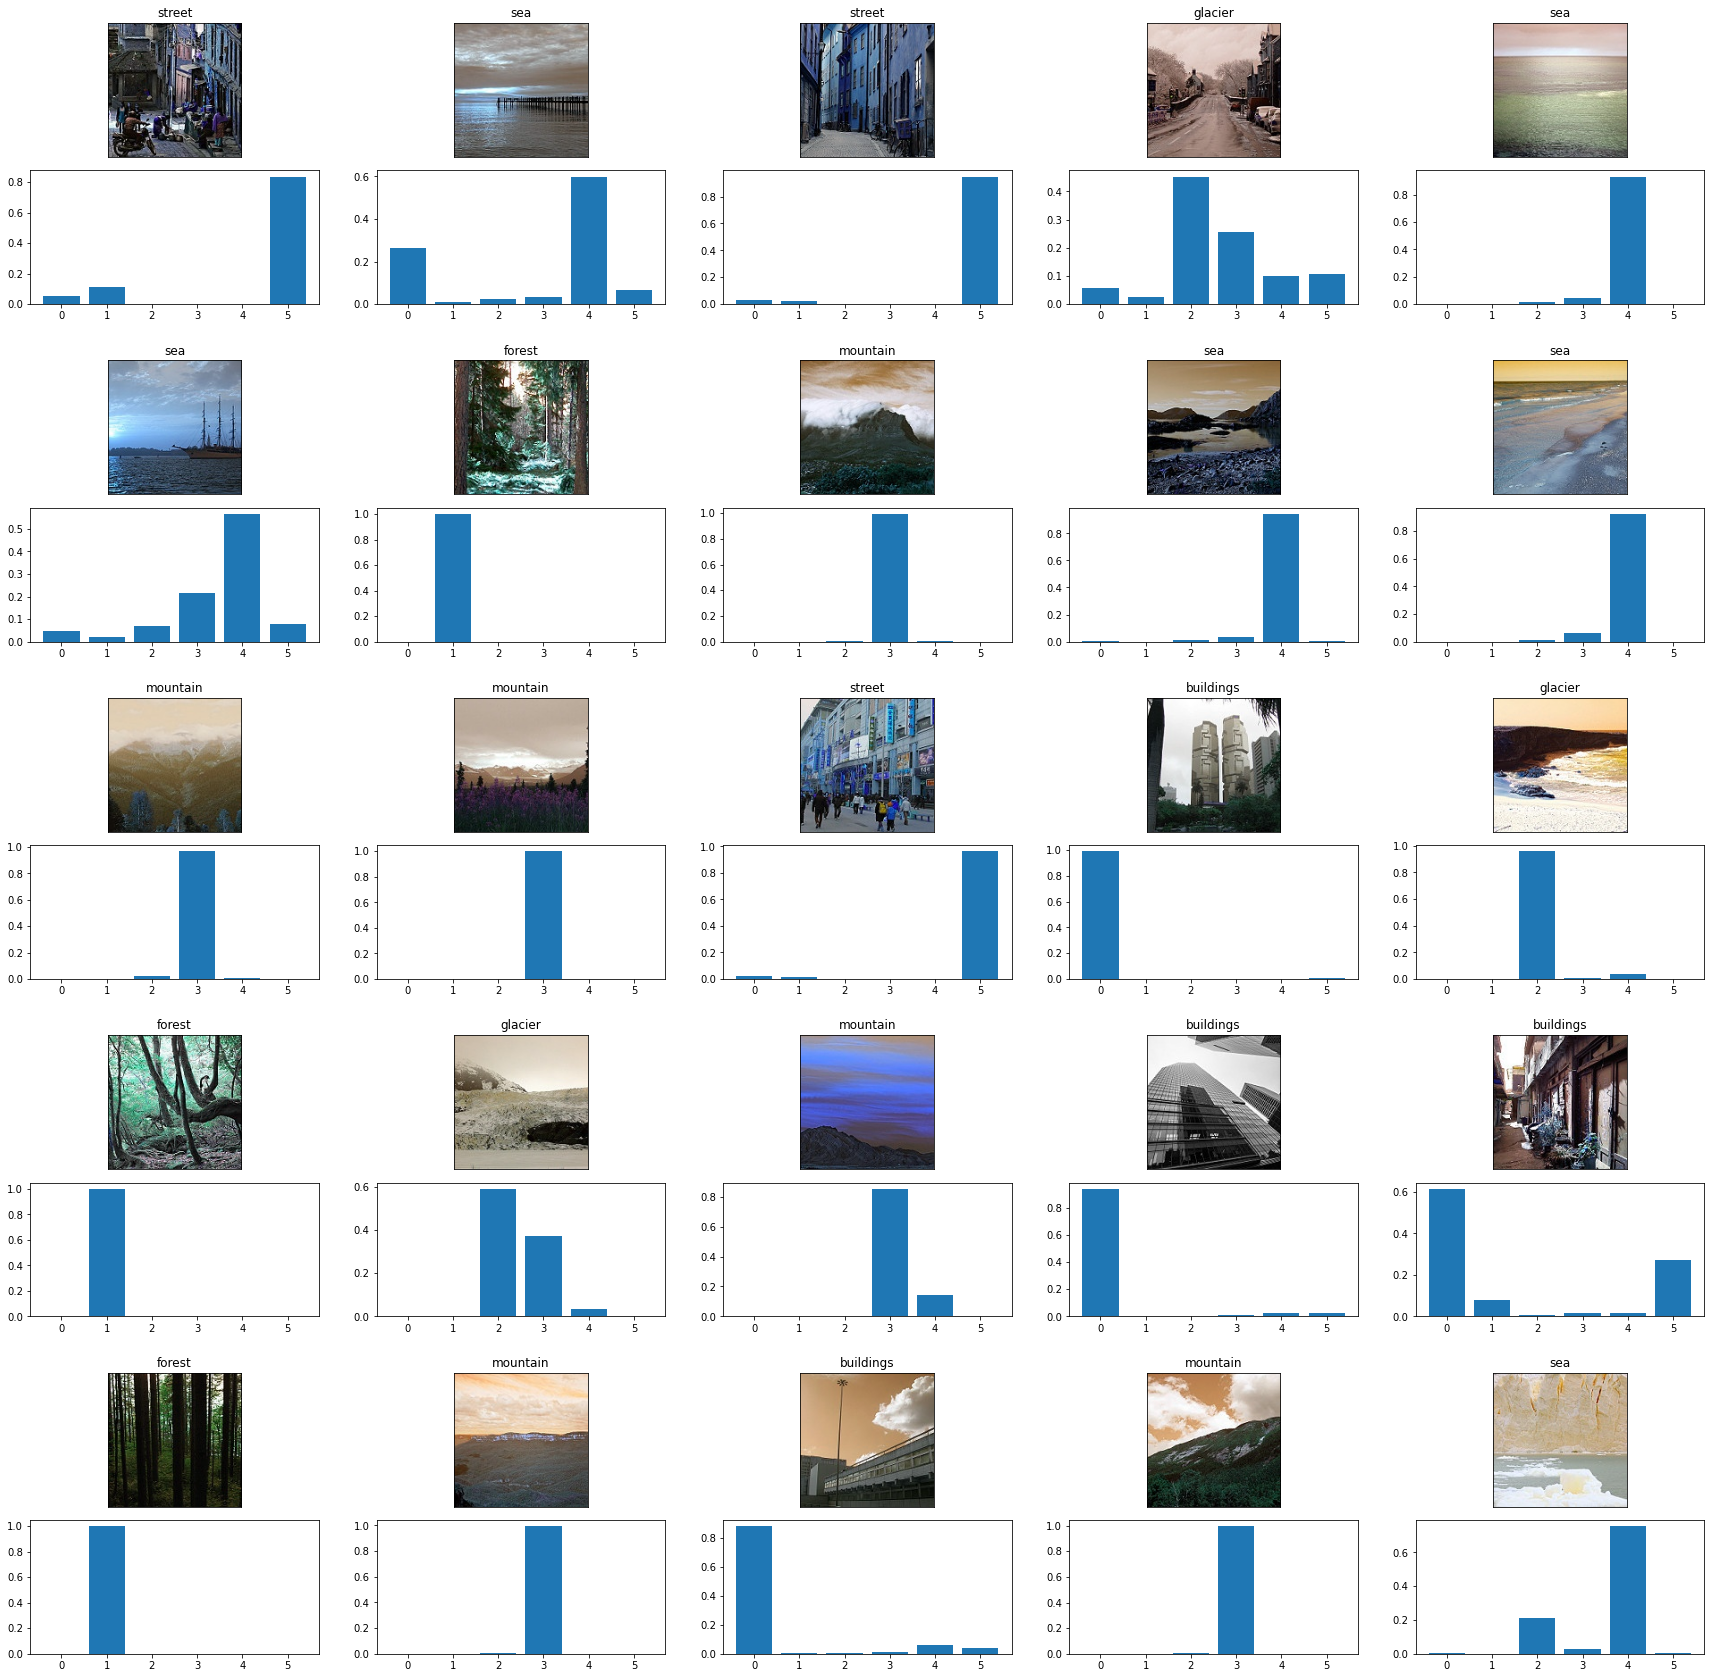

In [14]:
# Plotting some images and their predicted values.
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(test_images))
    pred_image = np.array([test_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        # It creates grid and set the image on the grid
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        # It shows the pred_prob's values on the bar plot below the related image    
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()